Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import warnings
import itertools
import statsmodels.api as sm
import seaborn as sns

Importing the Dataset

In [3]:
data=pd.read_excel("Crude Oil Prices Daily.xlsx")

In [4]:
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [5]:
data.to_csv ("crude_oil_price_daily.csv", index = None, header=True)

In [6]:
df=pd.read_csv('crude_oil_price_daily.csv')

In [7]:
df.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


Handling Missing Data

In [8]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [9]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [10]:
data.dropna(axis=0,inplace=True)

In [11]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

Feature Scaling

In [12]:
oil_price=data.reset_index()['Closing Value']
oil_price

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
oil_price=scaler.fit_transform(np.array(oil_price).reshape(-1,1))

Data Visualisation

Text(0.5, 1.0, 'Price Trend over years')

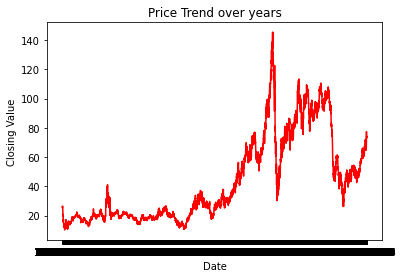

In [14]:
g = sns.lineplot(x='Date',y='Closing Value',data = df,color="red")
plt.title("Price Trend over years")

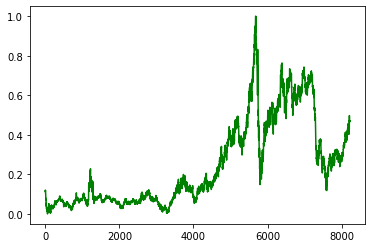

In [15]:
plt.plot(oil_price,color="green")

In [16]:
def price_plot_from_date_range(df, start_date, end_date):
    mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
    sdf = df.loc[mask]
    plt.figure(figsize = (10,5))
    chart = sns.lineplot(x='Date',y='Closing Value',data = sdf)
    plt.title("Price Trend over years")

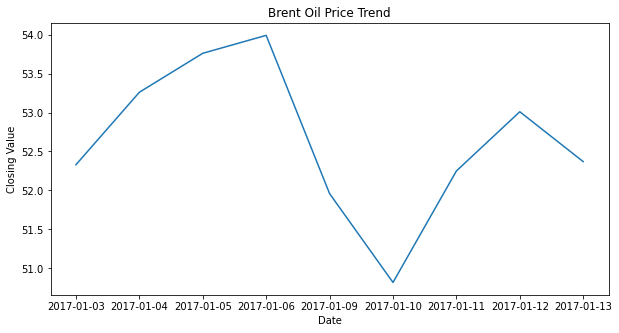

In [17]:
price_plot_from_date_range(df,'2017-01-01','2017-01-15')

Splitting Dataset into Train and Test

In [18]:
training_size=int(len(oil_price)*0.65)
test_size=len(oil_price)-training_size
train_data,test_data=oil_price[0:training_size,:],oil_price[training_size:len(oil_price),:1]

In [19]:
print("Training Data Size: ",training_size)
print("Test Data Size: ",test_size)

Training Data Size:  5340
Test Data Size:  2876


In [20]:
train_data.shape


(5340, 1)

In [21]:
test_data.shape

(2876, 1)

Creating Dataset With Sliding Windows

In [22]:
def Dataset_Creation(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [23]:
time_step=10
x_train,y_train=Dataset_Creation(train_data,time_step)
x_test,y_test=Dataset_Creation(test_data,time_step)

In [24]:
time_step=10
x_train,y_train=Dataset_Creation(train_data,time_step)
x_test,y_test=Dataset_Creation(test_data,time_step)

In [25]:
y_train.shape

(5329,)

In [26]:
print(x_test.shape)
print(y_test.shape)

(2865, 10)
(2865,)


In [27]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [28]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

# **Model Building**

In [29]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [30]:
model=Sequential()

Adding LSTM Layers

In [31]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
Model.add(Dropout(0.1))
model.add(LSTM(50,return_sequences=True))
Model.add(Dropout(0.1))
model.add(LSTM(50))

Adding Output Layers

In [31]:
model.add(Dense(1))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
Total params: 71,000
Trainable params: 71,000
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='mean_squared_error',optimizer='adam')

Training

In [40]:
  model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
84/84 [==============================] - 11s 53ms/step - loss: 1.4986e-04 - val_loss: 0.0048
Epoch 2/30
84/84 [==============================] - 3s 33ms/step - loss: 1.3868e-04 - val_loss: 0.0043
Epoch 3/30
84/84 [==============================] - 3s 33ms/step - loss: 1.3347e-04 - val_loss: 0.0025
Epoch 4/30
84/84 [==============================] - 3s 33ms/step - loss: 1.5993e-04 - val_loss: 0.0033
Epoch 5/30
84/84 [==============================] - 3s 33ms/step - loss: 1.3228e-04 - val_loss: 0.0024
Epoch 6/30
84/84 [==============================] - 3s 33ms/step - loss: 1.3057e-04 - val_loss: 0.0034
Epoch 7/30
84/84 [==============================] - 3s 33ms/step - loss: 1.2068e-04 - val_loss: 0.0032
Epoch 8/30
84/84 [==============================] - 3s 32ms/step - loss: 1.1354e-04 - val_loss: 0.0030
Epoch 9/30
84/84 [==============================] - 3s 33ms/step - loss: 1.1722e-04 - val_loss: 0.0031
Epoch 10/30
84/84 [==============================] - 4s 43ms/step - loss